In [42]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv",sep=",")

In [43]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [44]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [46]:
sns.set(color_codes=True)
%matplotlib inline

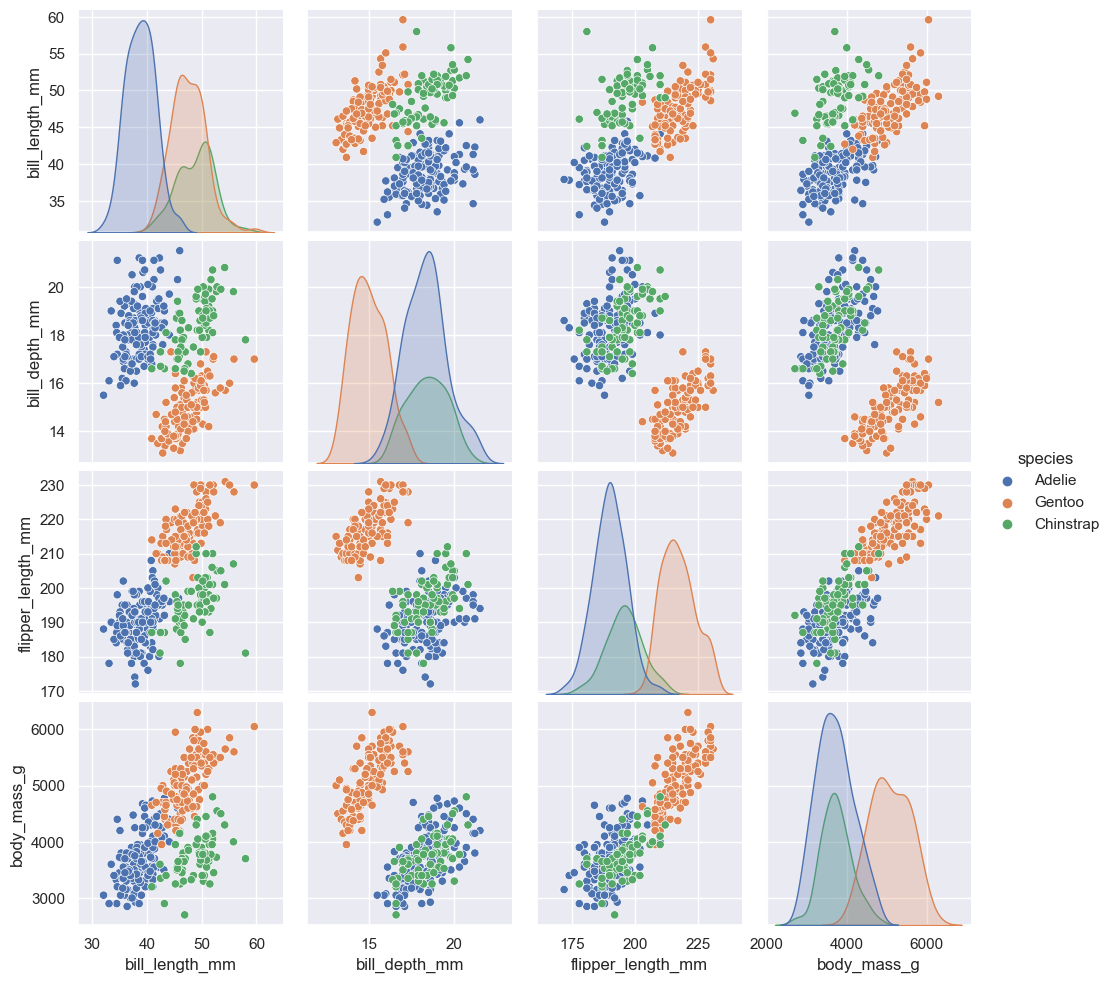

In [47]:
sns.pairplot(df,hue='species');

In [48]:
# vedo che la specie Gentoo ha la massa corporea + grande, la coda + lunga, minor profondità del becco rispetto alle altre 2 specie, che sono allineate 

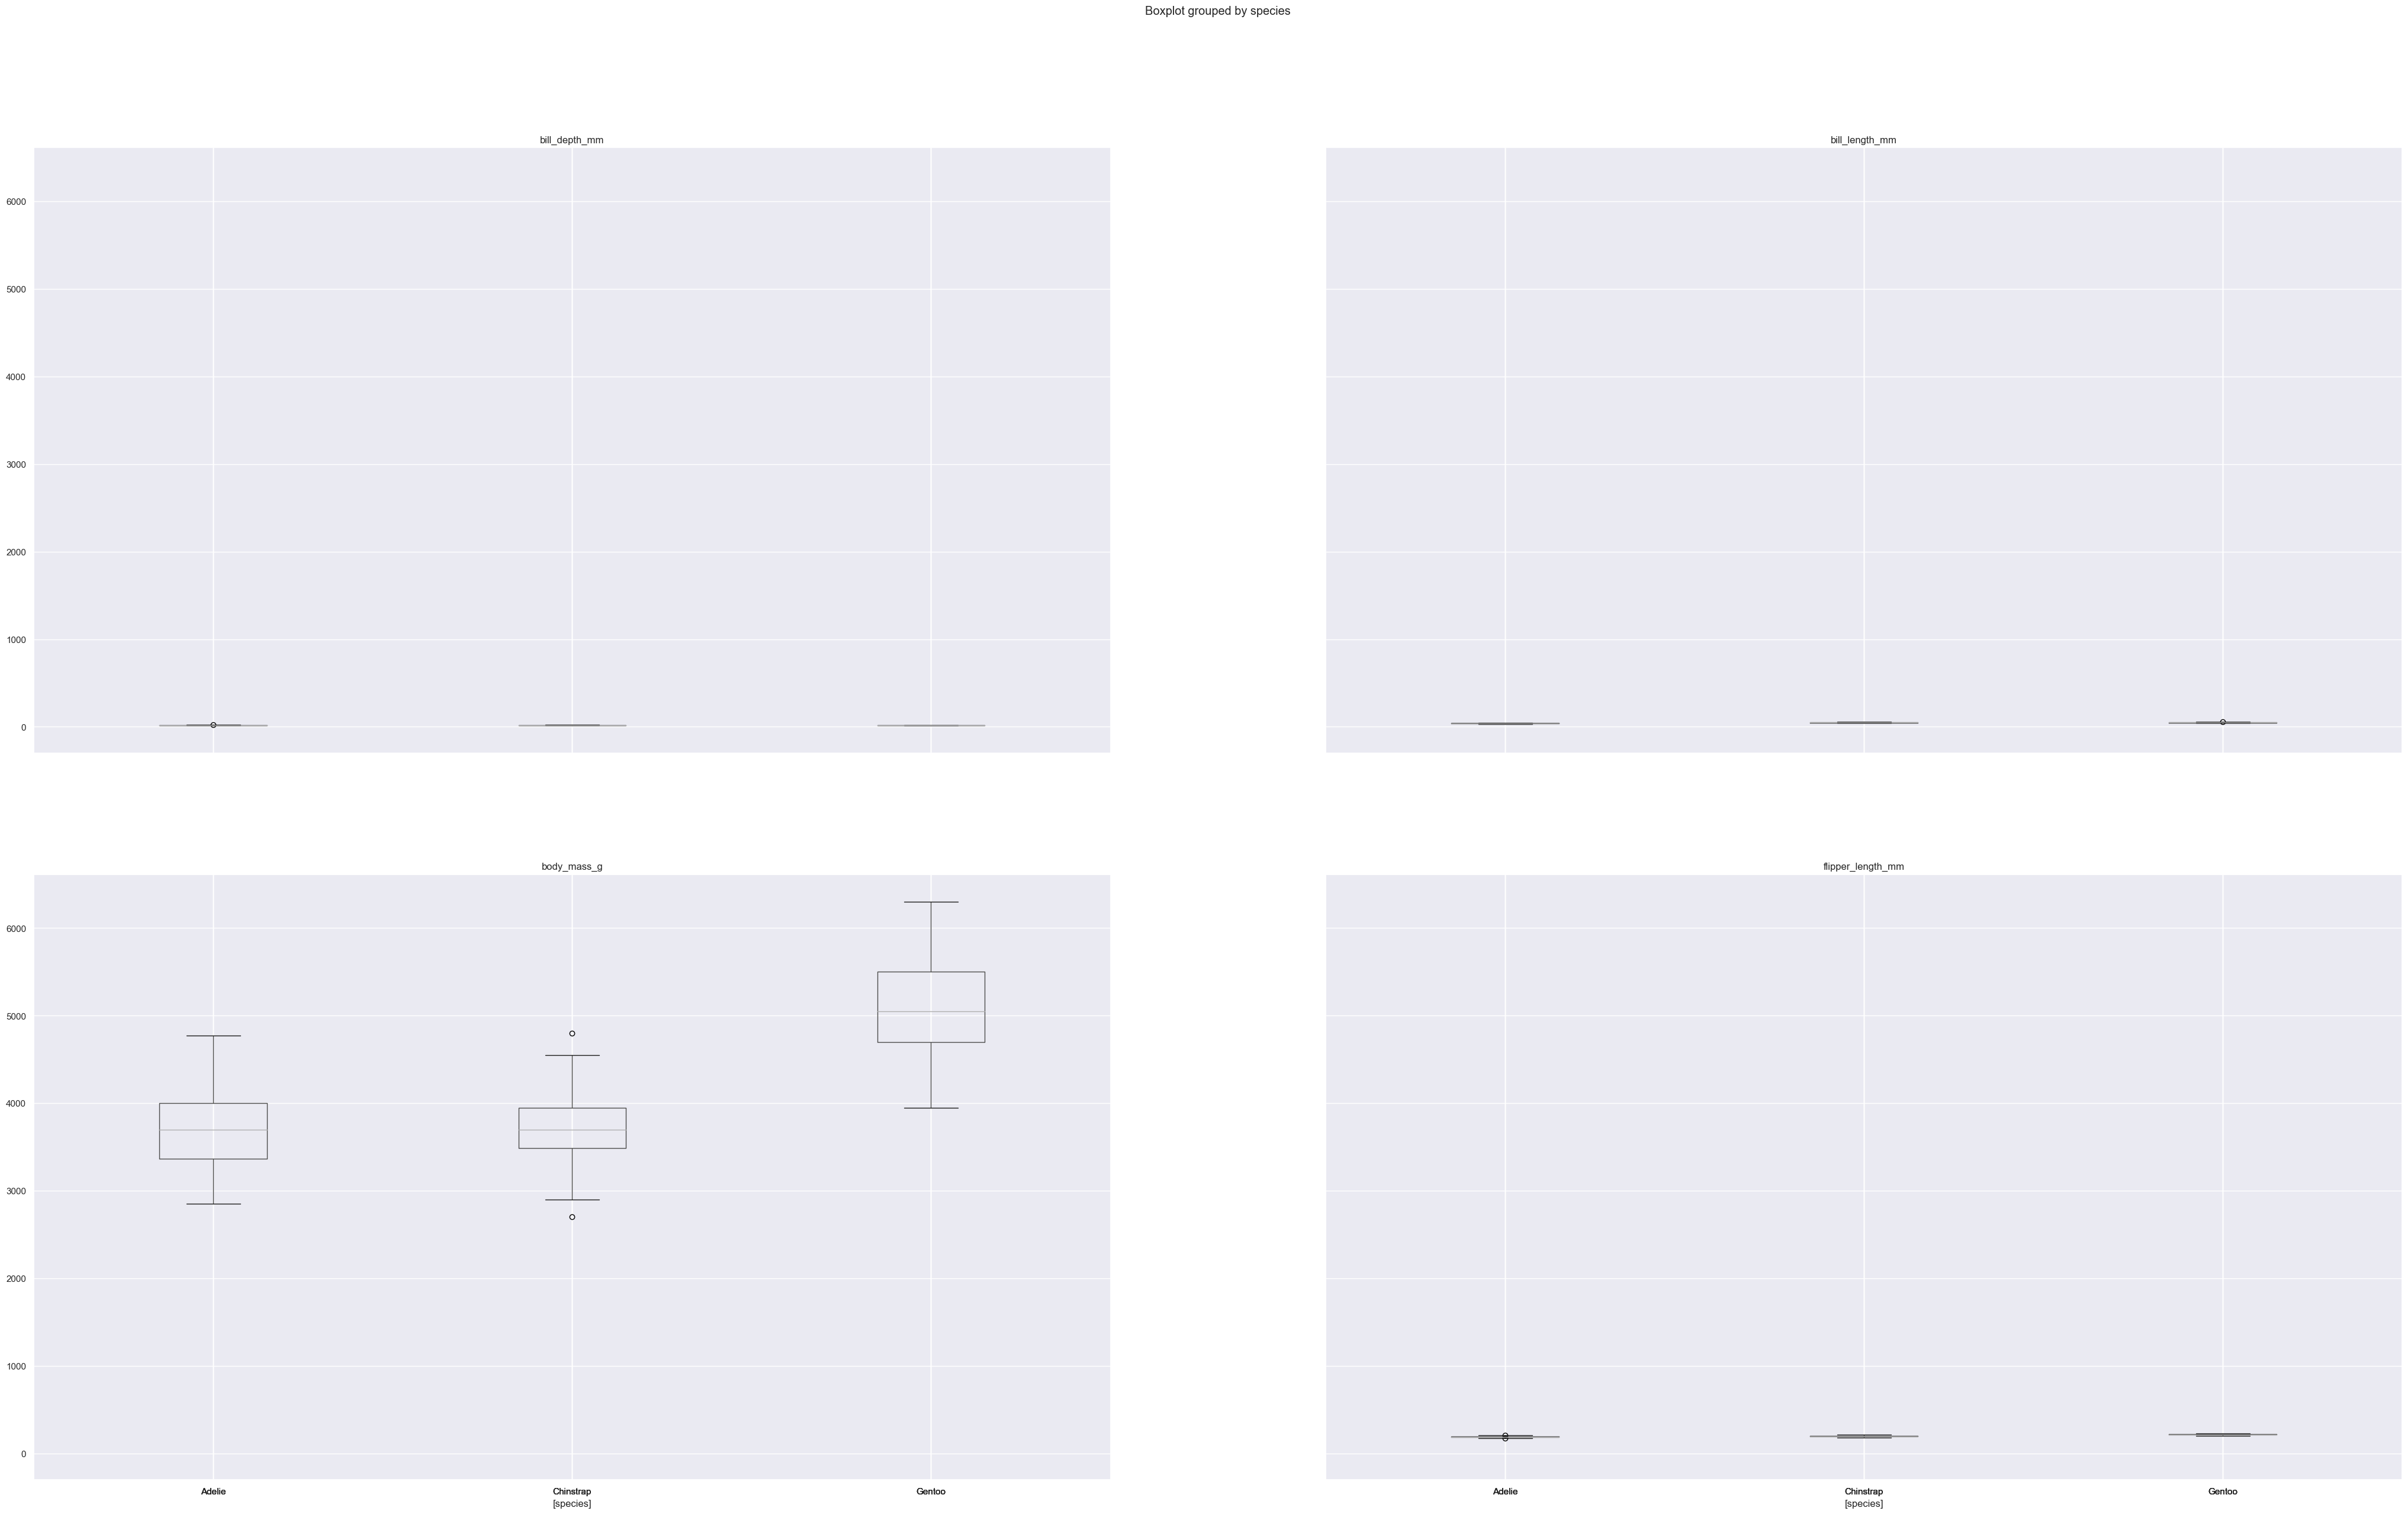

In [49]:
df.boxplot(by='species', figsize=(50,30));

In [50]:
#sns.violinplot(x='species', y='island', data=df) #solo una variabile stringa

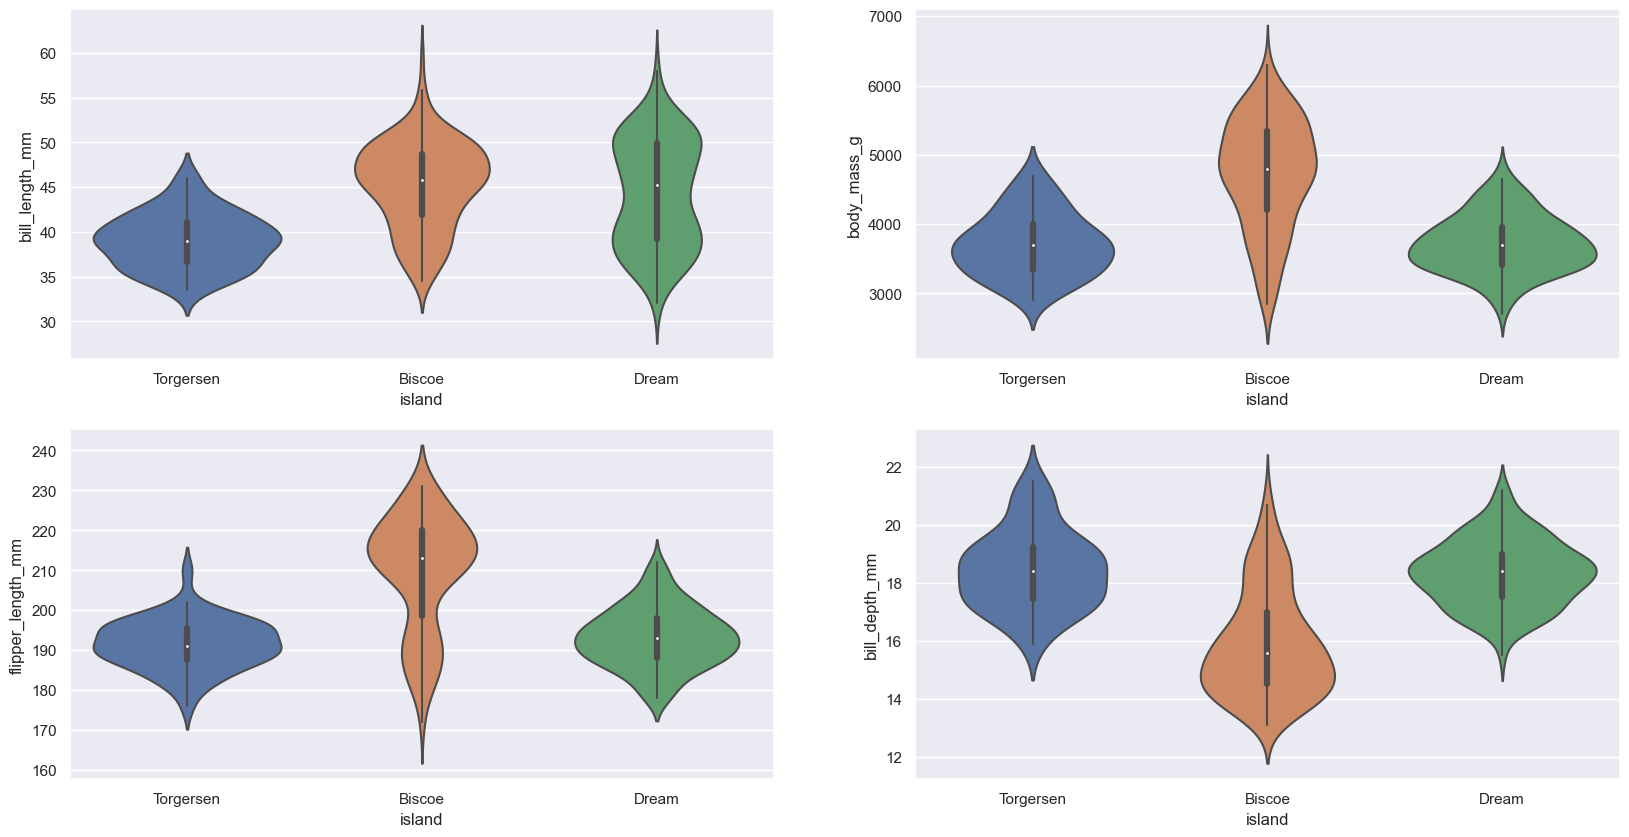

In [51]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='island', y='bill_length_mm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='island', y='body_mass_g', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='island', y='flipper_length_mm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='island', y='bill_depth_mm', data=df);

In [52]:
df=pd.get_dummies(df,columns=['island','sex'])

In [53]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,0,1,0,0,1
329,Chinstrap,43.5,18.1,202,3400,0,1,0,1,0
330,Chinstrap,49.6,18.2,193,3775,0,1,0,0,1
331,Chinstrap,50.8,19.0,210,4100,0,1,0,0,1


In [54]:
X=df.drop(columns='species')
y=df['species']

In [55]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,0,0,1,0,1
1,39.5,17.4,186,3800,0,0,1,1,0
2,40.3,18.0,195,3250,0,0,1,1,0
3,36.7,19.3,193,3450,0,0,1,1,0
4,39.3,20.6,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,0,1,0,0,1
329,43.5,18.1,202,3400,0,1,0,1,0
330,49.6,18.2,193,3775,0,1,0,0,1
331,50.8,19.0,210,4100,0,1,0,0,1


In [56]:
y

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
328    Chinstrap
329    Chinstrap
330    Chinstrap
331    Chinstrap
332    Chinstrap
Name: species, Length: 333, dtype: object

In [57]:
'''ora applico il modello su dati di test e train e li confornto.
 I dati di test sono dati che non ha mai
 visto'''
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() 
#creo un modello con regressione logistica

In [59]:
model #creato ma senza valori

LogisticRegression()

In [60]:
#assegno le variabili di train e di test, con la misura del campione e il random state
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 667
                                                    )

In [61]:
X_train.shape, X_test.shape
#visualizzo che farò l'allenamento sull'80% dei valori e il test sul 20%

((233, 9), (100, 9))

In [62]:
model.fit(X_train,y_train) 
#dico di fare il modello in base alle variabili di train

LogisticRegression()

In [63]:
y_pred=model.predict(X_test) 
#predizione su var. di test(20% del tot)

In [64]:
pd.DataFrame(list(zip(y_pred,y_test))) 
#splitto in 2 colonne gli input X e gli output y
'''La funzione pd.DataFrame crea un oggetto DataFrame di pandas che
 rappresenta una tabella dei dati. La funzione zip converte due 
 array in una serie di coppie di elementi corrispondenti. 
 In questo caso, y_pred e y_test sono due array che contengono le 
 previsioni e i valori effettivi rispettivamente. La funzione list
   è utilizzata per convertire il risultato della funzione zip in 
   una lista. L'output della funzione pd.DataFrame è una tabella 
   contenente le coppie di elementi corrispondenti di y_pred e y_test.'''

"La funzione pd.DataFrame crea un oggetto DataFrame di pandas che\n rappresenta una tabella dei dati. La funzione zip converte due \n array in una serie di coppie di elementi corrispondenti. \n In questo caso, y_pred e y_test sono due array che contengono le \n previsioni e i valori effettivi rispettivamente. La funzione list\n   è utilizzata per convertire il risultato della funzione zip in \n   una lista. L'output della funzione pd.DataFrame è una tabella \n   contenente le coppie di elementi corrispondenti di y_pred e y_test."

In [65]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])

In [66]:
res_df

,predicted,real
0,Adelie,Adelie
1,Chinstrap,Adelie
2,Gentoo,Gentoo
3,Adelie,Adelie
4,Gentoo,Gentoo
...,...,...
95,Gentoo,Gentoo
96,Chinstrap,Chinstrap
97,Gentoo,Gentoo
98,Adelie,Adelie


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
acc = accuracy_score(y_test,y_pred)
print(f"L'accuracy totale è:{round(acc,2)*100}%")

L'accuracy totale è:99.0%


In [69]:
import joblib

## to save a model , salvo un modello in file pkl
joblib.dump(model,'logistic_regression_test.pkl')

['logistic_regression_test.pkl']

In [70]:
## to load model, carico il modello 
newmodel = joblib.load('logistic_regression_test.pkl')
newmodel

LogisticRegression()

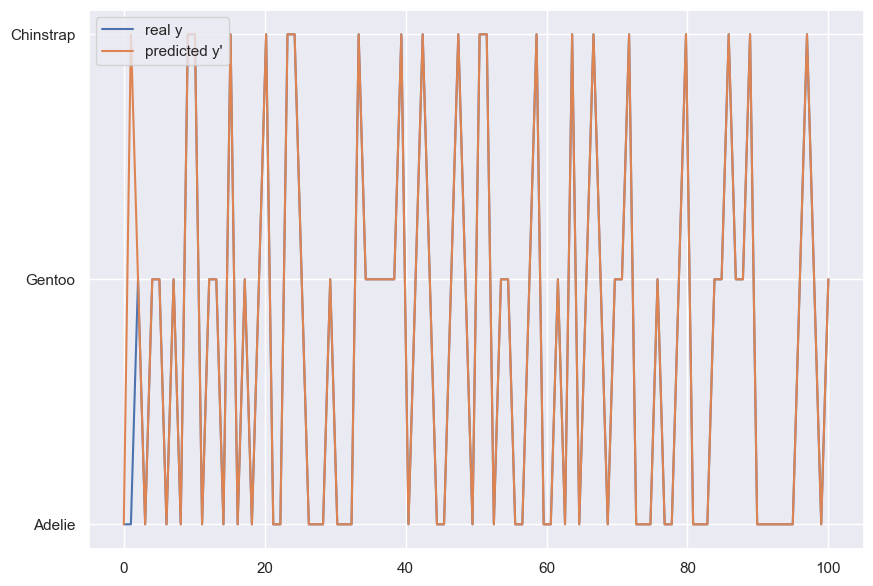

In [71]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);
#sbaglia predizione all'inizio

In [72]:
X[0:1] #prendo la prima riga e la copio in new model predict, perchè mi servono 9 valori

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,0,0,1,0,1


In [73]:
newmodel.predict([[39.1,18.7,181,3750,0,0,1,0,1]])[0]
#fatta predizione sui valori immessi da noi e restituisce la classe in cui più probabilmente rientra

'Adelie'

In [74]:
from sklearn.model_selection import cross_val_score #importo la cross valuation, testo il dataset sul 100% dei valori, presi un 20% alla volta

In [75]:
scores=cross_val_score(model, X, y, cv=5) 
#la cross valuation sul nostro modello, var X e y e fatta 5 volte. Ottengo 5 valutazioni di affidabilità da 0 a 1

scores

array([0.97014925, 0.98507463, 0.98507463, 1.        , 0.98484848])

In [76]:
acc_cv=np.mean(scores).round(3) #poi faccio la media
acc_cv

0.985

In [77]:
df['species']

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
328    Chinstrap
329    Chinstrap
330    Chinstrap
331    Chinstrap
332    Chinstrap
Name: species, Length: 333, dtype: object

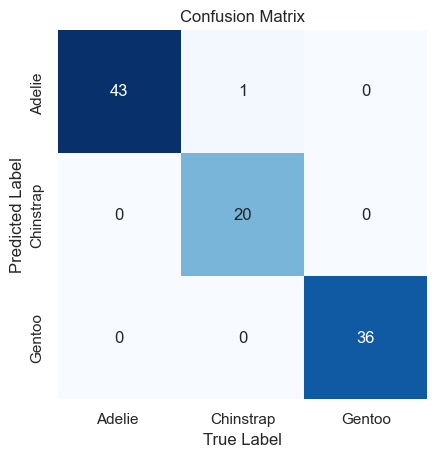

In [78]:
from sklearn.metrics import confusion_matrix
labels = ['Adelie ', 'Chinstrap', 'Gentoo']


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        44
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

